# Prediction of  Heteroscedastic Data Using Linear Regression and Various Machine Learning Models
#### AUTHOR: MUHAMMAD DANISH MUNIR

### Problem Statement:    Heteroscedasticity
This is 3 Different type of Dataset having problem of Heteroscedasticity. Heteroscedasticity problem arises if variance of error term should not be constant. If we apply the Linear Regression method to heteroscedastic data then predicted values are inaccurate and our inference may be wrong about data. So here apply diffrent type of Machine learning models and compare with Linear Regression

### Import necessary libraries

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

## ##################################
## DataSet A: Concrete Strength Prediction
## ##################################

In [2]:
data_A = pd.read_csv("ConcreteStrengthData.csv")

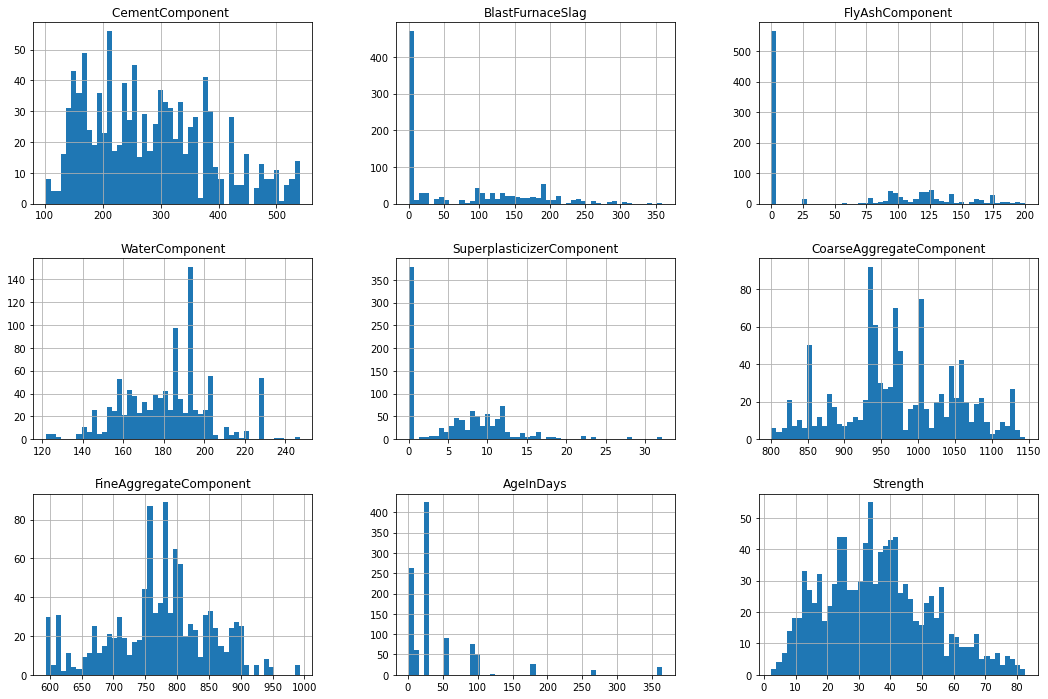

In [3]:
# Histogram
data_A.hist(bins=50,figsize=(18,12))
plt.show()

In [4]:
data_A.corr()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
CementComponent,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BlastFurnaceSlag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FlyAshComponent,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
WaterComponent,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
SuperplasticizerComponent,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CoarseAggregateComponent,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FineAggregateComponent,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
AgeInDays,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [5]:
data_A.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
# Features and Labels

x_A = data_A.iloc[:,0:8].values
y_A = (data_A.loc[:,"Strength"].values)


In [7]:
x_A

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

#### Train Test Spliting

In [8]:
from sklearn.model_selection import train_test_split 
xtrain_A, xtest_A, ytrain_A, ytest_A = train_test_split(x_A,y_A, test_size=.20, random_state=42)

## Model Selection 

### LinearRegression

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
lr.fit(xtrain_A,ytrain_A)

LinearRegression()

In [11]:
lpred_A = lr.predict(xtest_A)

In [12]:
from sklearn.metrics import mean_squared_error
lm_A = mean_squared_error(ytest_A,lpred_A)
lm_A

95.97094009110677

In [13]:
from sklearn.metrics import r2_score
rsq_A = r2_score(ytest_A,lpred_A)
rsq_A

0.6275531792314851

In [14]:
from sklearn.metrics import max_error
max_error(ytest_A,lpred_A)

27.78281956689682

In [15]:
Lresults_A = pd.DataFrame(lpred_A,ytest_A).reset_index()
Lresults_A.columns = ["orignal","Regression"]

In [16]:
Lresults_A

,orignal,Regression
0,52.91,59.658042
1,55.90,52.041211
2,74.50,63.535133
3,35.30,51.575457
4,10.54,17.220017
...,...,...
201,56.14,55.987586
202,18.75,17.479621
203,38.00,49.086522
204,74.36,54.181552


### DecisionTreeRegressor

In [17]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()

In [18]:
Dfit_A = DTR.fit(xtrain_A,ytrain_A)

In [19]:
Dpred_A = DTR.predict(xtest_A)

In [20]:
from sklearn.metrics import mean_squared_error
Dm_A = mean_squared_error(ytest_A,Dpred_A)
Dm_A

43.41951990291262

In [21]:
from sklearn.metrics import r2_score
Drsq_A = r2_score(ytest_A,Dpred_A)
Drsq_A

0.8314962619748933

In [22]:
from sklearn.metrics import max_error
max_error(ytest_A,Dpred_A)

23.04999999999999

In [23]:
Dresults_A = pd.DataFrame(Dpred_A,ytest_A).reset_index()
Dresults_A.columns = ["orignal","Decission Tree"]
Dresults_A

,orignal,Decission Tree
0,52.91,51.73
1,55.90,39.40
2,74.50,71.30
3,35.30,35.30
4,10.54,10.54
...,...,...
201,56.14,55.25
202,18.75,18.42
203,38.00,42.80
204,74.36,65.70


### RandomForestRegressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

In [25]:
RF.fit(xtrain_A,ytrain_A)

RandomForestRegressor()

In [26]:
Rpred_A = RF.predict(xtest_A)

In [27]:
from sklearn.metrics import mean_squared_error
Rm_A = mean_squared_error(ytest_A,Rpred_A)
Rm_A

30.393643613315543

In [28]:
from sklearn.metrics import r2_score
Rrsq_A = r2_score(ytest_A,Rpred_A)
Rrsq_A

0.8820474622359188

In [29]:
from sklearn.metrics import max_error
max_error(ytest_A,Rpred_A)

19.229499999999938

In [30]:
Rresults_A = pd.DataFrame(Rpred_A,ytest_A).reset_index()
Rresults_A.columns = ["orignal","RandomForest"]
Rresults_A

,orignal,RandomForest
0,52.91,51.229700
1,55.90,38.124800
2,74.50,71.417100
3,35.30,34.007733
4,10.54,11.643300
...,...,...
201,56.14,55.592755
202,18.75,24.429400
203,38.00,34.160800
204,74.36,66.945000


### GradientBoostingRegressor

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()

In [32]:
GB.fit(xtrain_A,ytrain_A)

GradientBoostingRegressor()

In [33]:
Gpred_A = GB.predict(xtest_A)

In [34]:
from sklearn.metrics import mean_squared_error
Gm_A = mean_squared_error(ytest_A,Gpred_A)
Gm_A

30.157300553777507

In [35]:
from sklearn.metrics import r2_score
Grsq_A = r2_score(ytest_A,Gpred_A)
Grsq_A

0.8829646692680899

In [36]:
from sklearn.metrics import max_error
max_error(ytest_A,Gpred_A)

22.12918971372978

In [37]:
Gresults_A = pd.DataFrame(Gpred_A,ytest_A).reset_index()
Gresults_A.columns = ["orignal","Gradient Boost"]
Gresults_A

,orignal,Gradient Boost
0,52.91,48.977092
1,55.90,45.763215
2,74.50,69.299746
3,35.30,34.171659
4,10.54,12.774094
...,...,...
201,56.14,58.577814
202,18.75,24.936507
203,38.00,46.379978
204,74.36,63.804978


### KNeighborsRegressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()

In [39]:
KNN.fit(xtrain_A,ytrain_A)

KNeighborsRegressor()

In [40]:
Kpred_A = KNN.predict(xtest_A)

In [41]:
from sklearn.metrics import mean_squared_error
Km_A = mean_squared_error(ytest_A,Kpred_A)
Km_A

67.80238333980583

In [42]:
from sklearn.metrics import r2_score
Krsq_A = r2_score(ytest_A,Gpred_A)
Krsq_A

0.8829646692680899

In [43]:
from sklearn.metrics import max_error
max_error(ytest_A,Gpred_A)

22.12918971372978

In [44]:
Kresults_A = pd.DataFrame(Kpred_A,ytest_A).reset_index()
Kresults_A.columns = ["orignal","KNN"]
Kresults_A

,orignal,KNN
0,52.91,52.064
1,55.90,44.140
2,74.50,64.338
3,35.30,39.120
4,10.54,12.214
...,...,...
201,56.14,52.498
202,18.75,20.864
203,38.00,56.564
204,74.36,54.192


### Summary

In [45]:
print("Regression","\n","Mean Square error : ",lm_A,"\n","r-sq score : ", rsq_A,"\n","\n"
     "Decisiontree","\n","Mean Square error : ",Dm_A,"\n","r-sq score : ", Drsq_A,"\n","\n"
     "Random Forest","\n","Mean Square error : ",Rm_A,"\n","r-sq score : ", Rrsq_A,"\n","\n"
     "Gradient Boost","\n","Mean Square error : ",Gm_A,"\n","r-sq score : ", Grsq_A,"\n","\n"
     "K Nearest Neighbors","\n","Mean Square error : ",Km_A,"\n","r-sq score : ",Krsq_A, "\n","\n")

Regression 
 Mean Square error :  95.97094009110677 
 r-sq score :  0.6275531792314851 
 
Decisiontree 
 Mean Square error :  43.41951990291262 
 r-sq score :  0.8314962619748933 
 
Random Forest 
 Mean Square error :  30.393643613315543 
 r-sq score :  0.8820474622359188 
 
Gradient Boost 
 Mean Square error :  30.157300553777507 
 r-sq score :  0.8829646692680899 
 
K Nearest Neighbors 
 Mean Square error :  67.80238333980583 
 r-sq score :  0.8829646692680899 
 



In [46]:
df_A = pd.DataFrame([ytest_A,lpred_A,Dpred_A,Rpred_A,Gpred_A,Kpred_A] ).T
df_A.columns = ["y test","Regression","Decision Tree","Random Forest","Gradient Boost","K Nearest Neighbors"]
df_A

,y test,Regression,Decision Tree,Random Forest,Gradient Boost,K Nearest Neighbors
0,52.91,59.658042,51.73,51.229700,48.977092,52.064
1,55.90,52.041211,39.40,38.124800,45.763215,44.140
2,74.50,63.535133,71.30,71.417100,69.299746,64.338
3,35.30,51.575457,35.30,34.007733,34.171659,39.120
4,10.54,17.220017,10.54,11.643300,12.774094,12.214
...,...,...,...,...,...,...
201,56.14,55.987586,55.25,55.592755,58.577814,52.498
202,18.75,17.479621,18.42,24.429400,24.936507,20.864
203,38.00,49.086522,42.80,34.160800,46.379978,56.564
204,74.36,54.181552,65.70,66.945000,63.804978,54.192


### Ploting Observed values vs prectided value

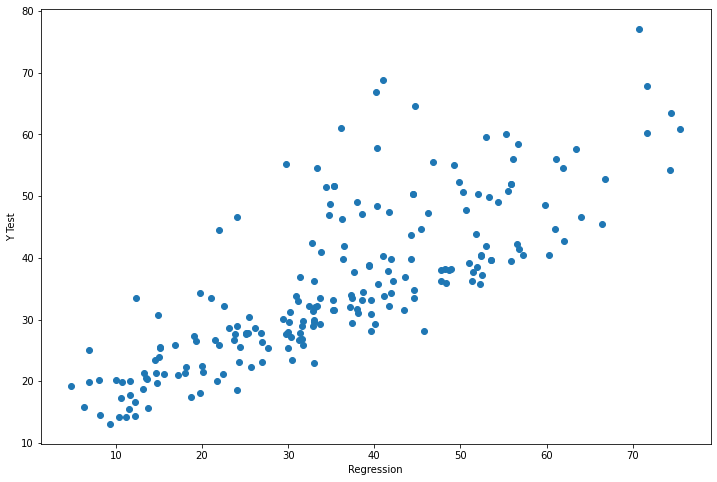

In [47]:
plt.figure(figsize=(12,8))
plt.scatter(ytest_A,lpred_A)
plt.xlabel("Regression")
plt.ylabel("Y Test")
plt.show()

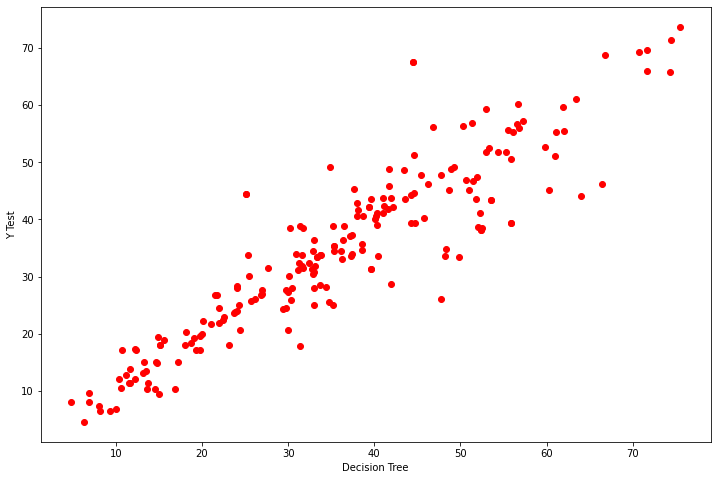

In [48]:
plt.figure(figsize=(12,8))
plt.scatter(ytest_A,Dpred_A, color='red')
plt.xlabel("Decision Tree")
plt.ylabel("Y Test")
plt.show()


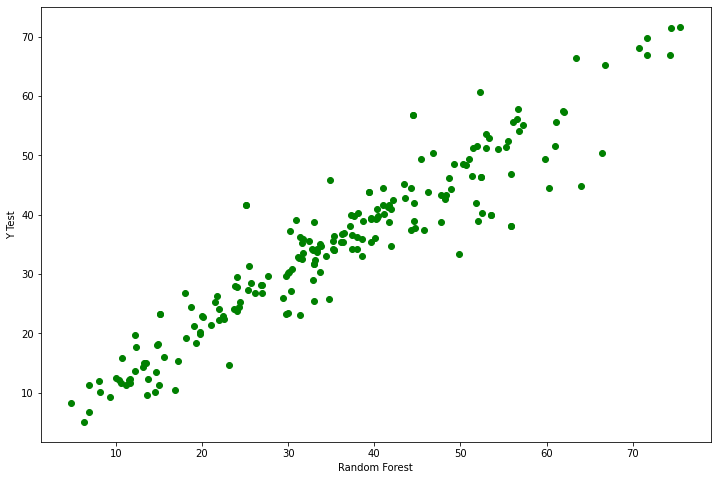

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(ytest_A,Rpred_A, color='green')
plt.xlabel("Random Forest")
plt.ylabel("Y Test")
plt.show()


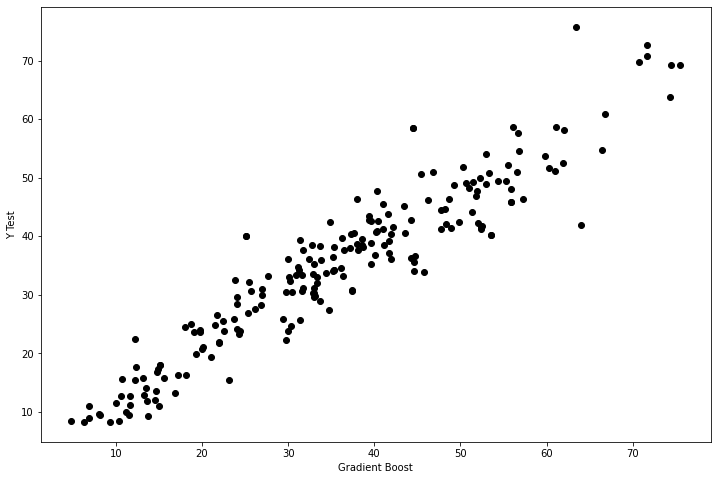

In [50]:
plt.figure(figsize=(12,8))
plt.scatter(ytest_A,Gpred_A,  color='black')
plt.xlabel("Gradient Boost")
plt.ylabel("Y Test")
plt.show()


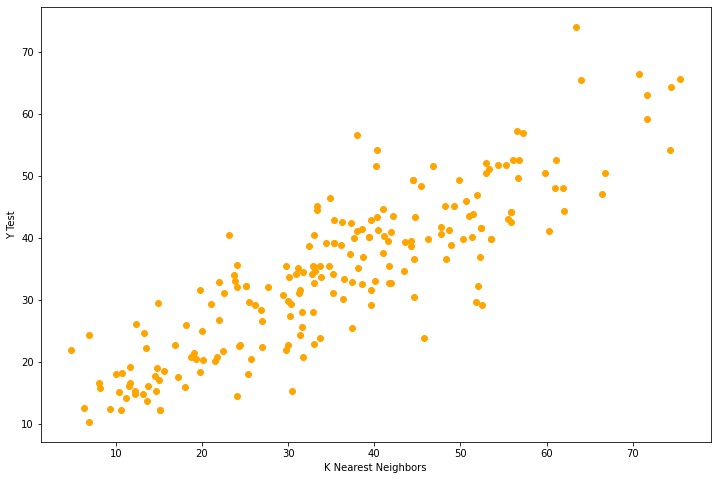

In [51]:
plt.figure(figsize=(12,8))
plt.scatter(ytest_A,Kpred_A, color='orange')
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Y Test")
plt.show()

## ###################################
## DataSet B: Advertising Budget and Sales
## ###################################

In [52]:
data_B = pd.read_csv("Advertising Budget and Sales.csv")

In [53]:
data_B

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [54]:
data_B = data_B.iloc[:,1:5]

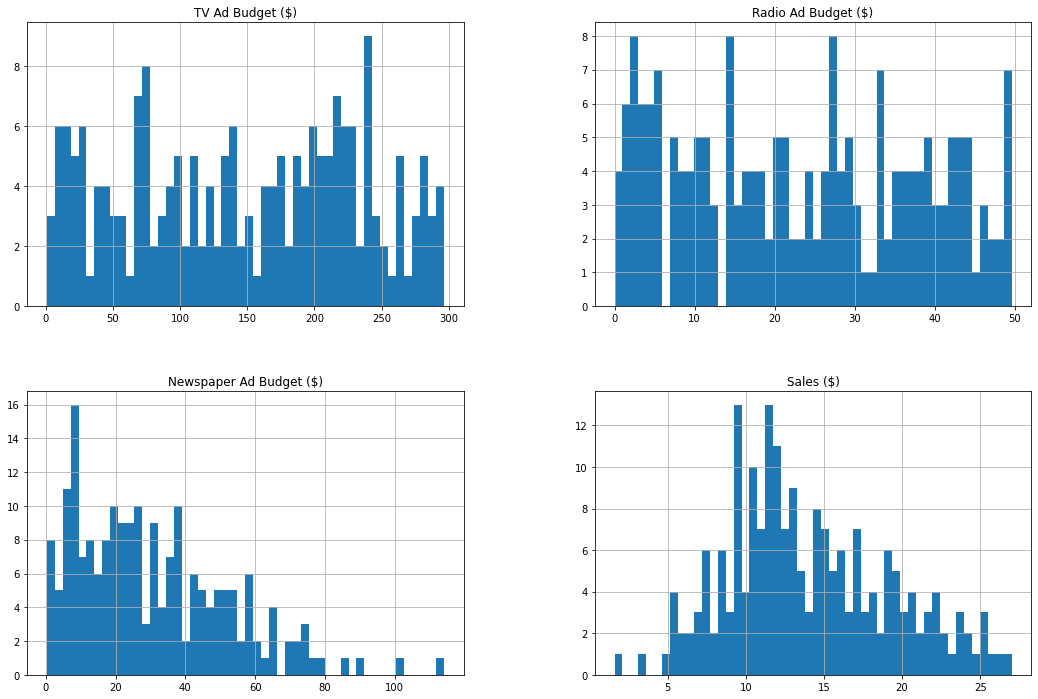

In [55]:
# Histogram
data_B.hist(bins=50,figsize=(18,12))
plt.show()

In [56]:
data_B.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [57]:
# Features and Labels

x_B = data_B.iloc[:,0:3].values
y_B = (data_B.loc[:,"Sales ($)"].values)*100

In [58]:
y_B

array([2210., 1040.,  930., 1850., 1290.,  720., 1180., 1320.,  480.,
       1060.,  860., 1740.,  920.,  970., 1900., 2240., 1250., 2440.,
       1130., 1460., 1800., 1250.,  560., 1550.,  970., 1200., 1500.,
       1590., 1890., 1050., 2140., 1190.,  960., 1740.,  950., 1280.,
       2540., 1470., 1010., 2150., 1660., 1710., 2070., 1290.,  850.,
       1490., 1060., 2320., 1480.,  970., 1140., 1070., 2260., 2120.,
       2020., 2370.,  550., 1320., 2380., 1840.,  810., 2420., 1570.,
       1400., 1800.,  930.,  950., 1340., 1890., 2230., 1830., 1240.,
        880., 1100., 1700.,  870.,  690., 1420.,  530., 1100., 1180.,
       1230., 1130., 1360., 2170., 1520., 1200., 1600., 1290., 1670.,
       1120.,  730., 1940., 2220., 1150., 1690., 1170., 1550., 2540.,
       1720., 1170., 2380., 1480., 1470., 2070., 1920.,  720.,  870.,
        530., 1980., 1340., 2180., 1410., 1590., 1460., 1260., 1220.,
        940., 1590.,  660., 1550.,  700., 1160., 1520., 1970., 1060.,
        660.,  880.,

#### Train Test Spliting

In [59]:
from sklearn.model_selection import train_test_split 
xtrain_B, xtest_B, ytrain_B, ytest_B = train_test_split(x_B,y_B, test_size=.20, random_state=42)

## Model Selection

### Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [61]:
lr.fit(xtrain_B,ytrain_B)

LinearRegression()

In [62]:
lpred_B = lr.predict(xtest_B)

In [63]:
from sklearn.metrics import mean_squared_error
lm_B = mean_squared_error(ytest_B,lpred_B)
lm_B

31740.973539761046

In [64]:
from sklearn.metrics import r2_score
rsq_B = r2_score(ytest_B,lpred_B)
rsq_B

0.899438024100912

In [65]:
from sklearn.metrics import max_error
max_error(ytest_B,lpred_B)

360.3493328870412

In [66]:
Lresults_B = pd.DataFrame(lpred_B,ytest_B).reset_index()
Lresults_B.columns = ["orignal","Regression"]

In [67]:
Lresults_B

,orignal,Regression
0,1690.0,1640.802420
1,2240.0,2088.988209
2,2140.0,2155.384318
3,730.0,1060.850256
4,2470.0,2211.237326
5,1260.0,1310.559172
6,2230.0,2105.719192
7,840.0,746.101034
8,1150.0,1360.634581
9,1490.0,1515.506967


### DecisionTreeRegressor

In [68]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()

In [69]:
Dfit_B = DTR.fit(xtrain_B,ytrain_B)

In [70]:
Dpred_B = DTR.predict(xtest_B)

In [71]:
from sklearn.metrics import mean_squared_error
Dm_B = mean_squared_error(ytest_B,Dpred_B)
Dm_B

24852.500000000004

In [72]:
from sklearn.metrics import r2_score
Drsq_B = r2_score(ytest_B,Dpred_B)
Drsq_B

0.9212621344804883

In [73]:
from sklearn.metrics import max_error
max_error(ytest_B,Dpred_B)

630.0

In [74]:
Dresults_B = pd.DataFrame(Dpred_B,ytest_B).reset_index()
Dresults_B.columns = ["orignal","Decission Tree"]
Dresults_B

,orignal,Decission Tree
0,1690.0,1850.0
1,2240.0,2070.0
2,2140.0,2020.0
3,730.0,660.0
4,2470.0,2380.0
5,1260.0,1330.0
6,2230.0,2260.0
7,840.0,970.0
8,1150.0,1170.0
9,1490.0,1460.0


### RandomForestRegressor

In [75]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

In [76]:
RF.fit(xtrain_B,ytrain_B)

RandomForestRegressor()

In [77]:
Rpred_B = RF.predict(xtest_B)

In [78]:
from sklearn.metrics import mean_squared_error
Rm_B = mean_squared_error(ytest_B,Rpred_B)
Rm_B

5808.286000000001

In [79]:
from sklearn.metrics import r2_score
Rrsq_B = r2_score(ytest_B,Rpred_B)
Rrsq_B

0.981598147390932

In [80]:
from sklearn.metrics import max_error
max_error(ytest_B,Rpred_B)

199.89999999999998

In [81]:
Rresults_B = pd.DataFrame(Rpred_B,ytest_B).reset_index()
Rresults_B.columns = ["orignal","RandomForest"]
Rresults_B

,orignal,RandomForest
0,1690.0,1775.5
1,2240.0,2192.0
2,2140.0,2104.5
3,730.0,674.0
4,2470.0,2311.8
5,1260.0,1337.6
6,2230.0,2274.9
7,840.0,963.6
8,1150.0,1188.7
9,1490.0,1548.5


### GradientBoostingRegressor

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()

In [83]:
GB.fit(xtrain_B,ytrain_B)

GradientBoostingRegressor()

In [84]:
Gpred_B = GB.predict(xtest_B)

In [85]:
from sklearn.metrics import mean_squared_error
Gm_B = mean_squared_error(ytest_B,Gpred_B)
Gm_B

5216.4486877299805

In [86]:
from sklearn.metrics import r2_score
Grsq_B = r2_score(ytest_B,Gpred_B)
Grsq_B

0.9834732105315797

In [87]:
from sklearn.metrics import max_error
max_error(ytest_B,Gpred_B)

172.3895951080508

In [88]:
Gresults_B = pd.DataFrame(Gpred_B,ytest_B).reset_index()
Gresults_B.columns = ["orignal","Gradient Boost"]
Gresults_B

,orignal,Gradient Boost
0,1690.0,1741.936880
1,2240.0,2175.323977
2,2140.0,2026.621166
3,730.0,651.567214
4,2470.0,2361.986725
5,1260.0,1304.853214
6,2230.0,2285.250461
7,840.0,943.520333
8,1150.0,1190.058482
9,1490.0,1587.305362


### KNeighborsRegressor

In [89]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()

In [90]:
KNN.fit(xtrain_B,ytrain_B)

KNeighborsRegressor()

In [91]:
Kpred_B = KNN.predict(xtest_B)

In [92]:
from sklearn.metrics import mean_squared_error
Km_B = mean_squared_error(ytest_B,Kpred_B)
Km_B

28211.400000000005

In [93]:
from sklearn.metrics import r2_score
Krsq_B = r2_score(ytest_B,Gpred_B)
Krsq_B

0.9834732105315797

In [94]:
from sklearn.metrics import max_error
max_error(ytest_B,Gpred_B)

172.3895951080508

In [95]:
Kresults_B = pd.DataFrame(Kpred_B,ytest_B).reset_index()
Kresults_B.columns = ["orignal","KNN"]
Kresults_B

,orignal,KNN
0,1690.0,1692.0
1,2240.0,2098.0
2,2140.0,2342.0
3,730.0,738.0
4,2470.0,1972.0
5,1260.0,1430.0
6,2230.0,2212.0
7,840.0,912.0
8,1150.0,1238.0
9,1490.0,1618.0


### Summary

In [96]:
print("Regression","\n","Mean Square error : ",lm_B,"\n","r-sq score : ", rsq_B,"\n","\n"
     "Decisiontree","\n","Mean Square error : ",Dm_B,"\n","r-sq score : ", Drsq_B,"\n","\n"
     "Random Forest","\n","Mean Square error : ",Rm_B,"\n","r-sq score : ", Rrsq_B,"\n","\n"
     "Gradient Boost","\n","Mean Square error : ",Gm_B,"\n","r-sq score : ", Grsq_B,"\n","\n"
     "K Nearest Neighbors","\n","Mean Square error : ",Km_B,"\n","r-sq score : ",Krsq_B, "\n","\n")

Regression 
 Mean Square error :  31740.973539761046 
 r-sq score :  0.899438024100912 
 
Decisiontree 
 Mean Square error :  24852.500000000004 
 r-sq score :  0.9212621344804883 
 
Random Forest 
 Mean Square error :  5808.286000000001 
 r-sq score :  0.981598147390932 
 
Gradient Boost 
 Mean Square error :  5216.4486877299805 
 r-sq score :  0.9834732105315797 
 
K Nearest Neighbors 
 Mean Square error :  28211.400000000005 
 r-sq score :  0.9834732105315797 
 



In [97]:
df_B = pd.DataFrame([ytest_B,lpred_B,Dpred_B,Rpred_B,Gpred_B,Kpred_B] ).T
df_B.columns = ["y test","Regression","Decision Tree","Random Forest","Gradient Boost","K Nearest Neighbors"]
df_B

,y test,Regression,Decision Tree,Random Forest,Gradient Boost,K Nearest Neighbors
0,1690.0,1640.802420,1850.0,1775.5,1741.936880,1692.0
1,2240.0,2088.988209,2070.0,2192.0,2175.323977,2098.0
2,2140.0,2155.384318,2020.0,2104.5,2026.621166,2342.0
3,730.0,1060.850256,660.0,674.0,651.567214,738.0
4,2470.0,2211.237326,2380.0,2311.8,2361.986725,1972.0
5,1260.0,1310.559172,1330.0,1337.6,1304.853214,1430.0
6,2230.0,2105.719192,2260.0,2274.9,2285.250461,2212.0
7,840.0,746.101034,970.0,963.6,943.520333,912.0
8,1150.0,1360.634581,1170.0,1188.7,1190.058482,1238.0
9,1490.0,1515.506967,1460.0,1548.5,1587.305362,1618.0


### Ploting Observed values vs prectided value

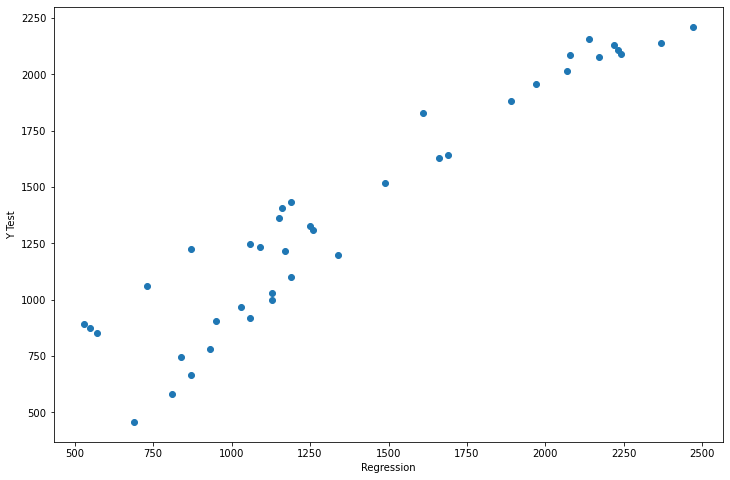

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(ytest_B,lpred_B)
plt.xlabel("Regression")
plt.ylabel("Y Test")
plt.show()

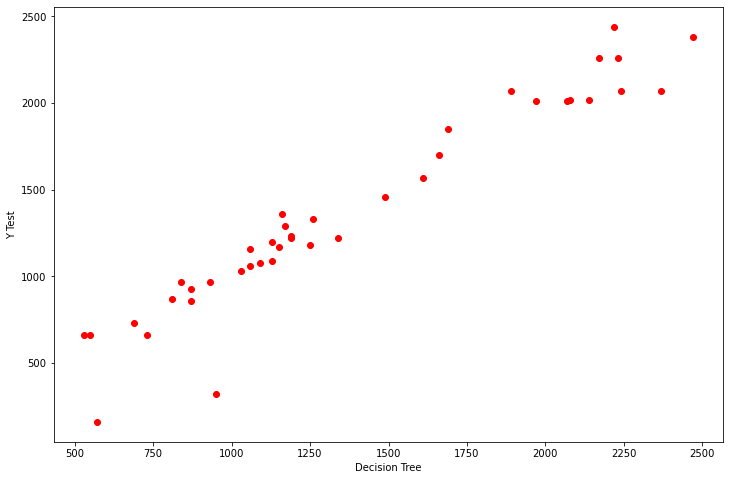

In [99]:
plt.figure(figsize=(12,8))
plt.scatter(ytest_B,Dpred_B, color='red')
plt.xlabel("Decision Tree")
plt.ylabel("Y Test")
plt.show()

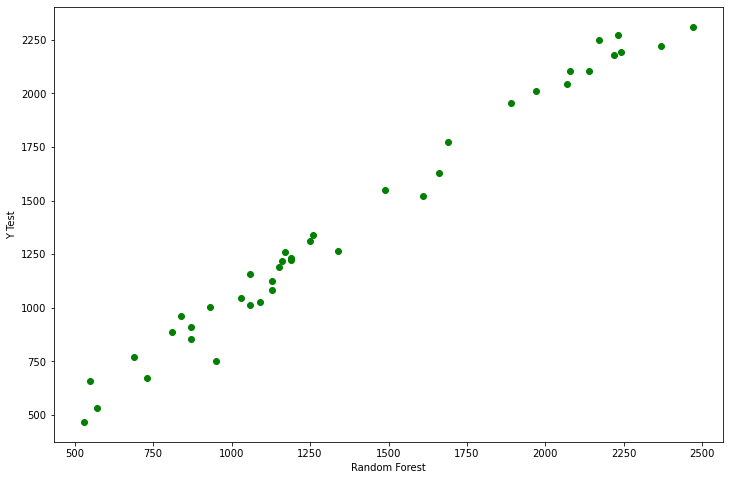

In [100]:
plt.figure(figsize=(12,8))
plt.scatter(ytest_B,Rpred_B, color='green')
plt.xlabel("Random Forest")
plt.ylabel("Y Test")
plt.show()


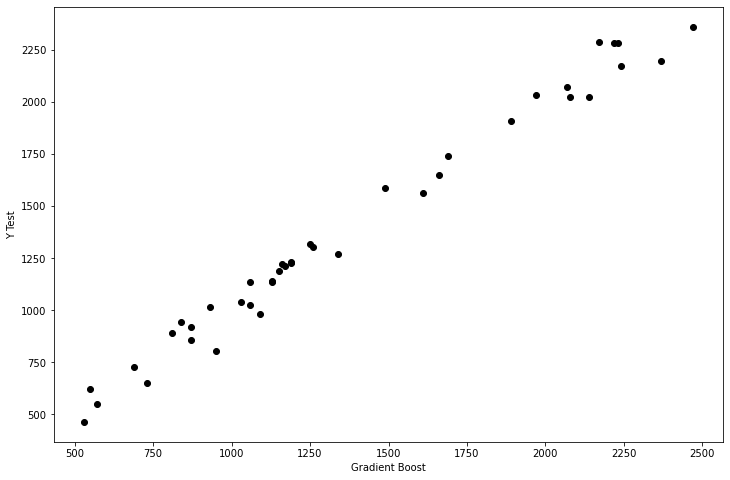

In [101]:
plt.figure(figsize=(12,8))
plt.scatter(ytest_B,Gpred_B,  color='black')
plt.xlabel("Gradient Boost")
plt.ylabel("Y Test")
plt.show()

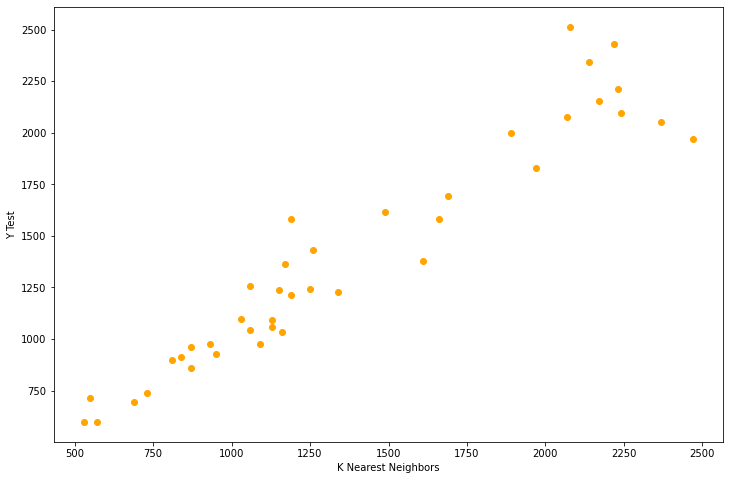

In [102]:
plt.figure(figsize=(12,8))
plt.scatter(ytest_B,Kpred_B, color='orange')
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Y Test")
plt.show()

## ##############################################
## DataSet C: Computer Harderware Proformance Check
## ##############################################

In [103]:
data_C = pd.read_csv("machine.csv")

In [104]:
data_C

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,estimated relative performance from the original
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...,...
203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,sratus,32,125,2000,8000,0,2,14,52,41
206,wang,vs-100,480,512,8000,32,0,0,67,47


In [105]:
data_C.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,estimated relative performance from the original
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


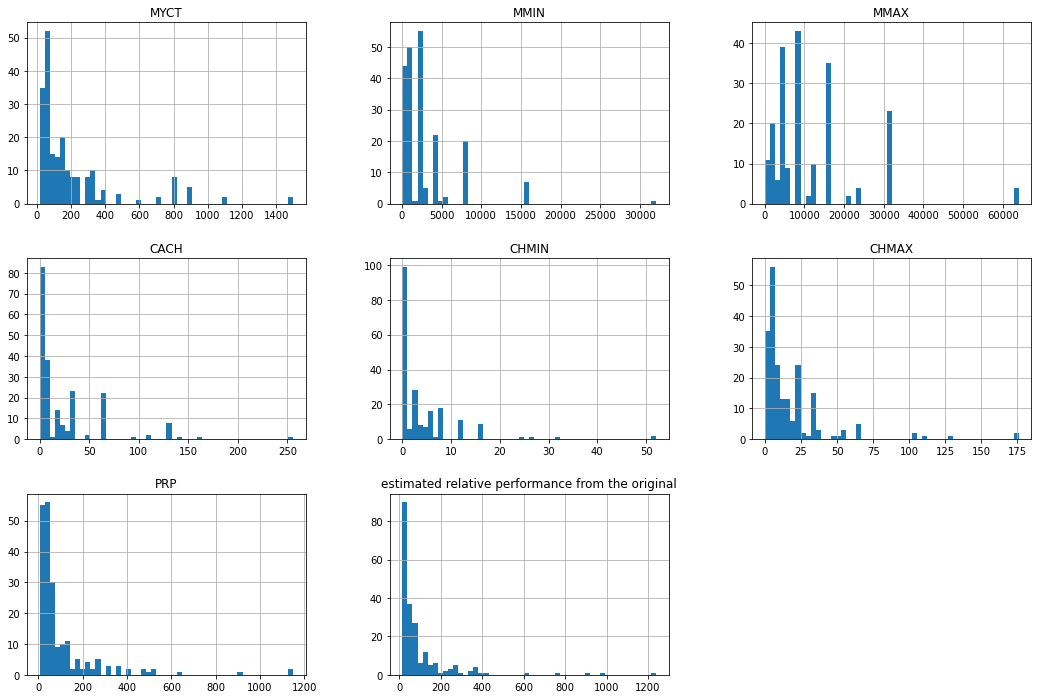

In [106]:
data_C.hist(bins=50,figsize=(18,12))
plt.show()

In [107]:
# Features and Labels

x_C = data_C.iloc[:,2:9].values
y_C = (data_C.loc[:,"estimated relative performance from the original"].values)


In [108]:
x_C

array([[   29,  8000, 32000, ...,     8,    32,   269],
       [   29,  8000, 32000, ...,     8,    32,   220],
       [   29,  8000, 32000, ...,     8,    32,   172],
       ...,
       [  125,  2000,  8000, ...,     2,    14,    52],
       [  480,   512,  8000, ...,     0,     0,    67],
       [  480,  1000,  4000, ...,     0,     0,    45]], dtype=int64)

In [109]:
import sklearn

In [110]:
from sklearn.model_selection import train_test_split 
xtrain_C, xtest_C, ytrain_C, ytest_C = train_test_split(x_C,y_C, test_size=.20, random_state=42)

## Model Selection

### LinearRegression

In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [112]:
lr.fit(xtrain_C,ytrain_C)

LinearRegression()

In [113]:
lpred_C = lr.predict(xtest_C)

In [114]:
from sklearn.metrics import mean_squared_error
lm_C = mean_squared_error(ytest_C,lpred_C)
lm_C

2744.432825097531

In [115]:
from sklearn.metrics import r2_score
rsq_C = r2_score(ytest_C,lpred_C)
rsq_C

0.9056469722537924

In [116]:
from sklearn.metrics import max_error
max_error(ytest_C,lpred_C)

189.89467904772152

In [117]:
Lresults_C = pd.DataFrame(lpred_C,ytest_C).reset_index()
Lresults_C.columns = ["orignal","Regression"]

In [118]:
Lresults_C

,orignal,Regression
0,47,41.209360
1,23,1.941653
2,25,29.557511
3,220,306.252724
4,142,106.223010
5,23,25.431848
6,35,24.945018
7,88,76.166100
8,124,53.194968
9,48,82.471550


### DecisionTreeRegressor

In [119]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()

In [120]:
Dfit_C = DTR.fit(xtrain_C,ytrain_C)

In [121]:
Dpred_C = DTR.predict(xtest_C)

In [122]:
from sklearn.metrics import mean_squared_error
Dm_C = mean_squared_error(ytest_C,Dpred_C)
Dm_C

1373.9285714285713

In [123]:
from sklearn.metrics import r2_score
Drsq_C = r2_score(ytest_C,Dpred_C)
Drsq_C

0.952764622461947

In [124]:
from sklearn.metrics import max_error
max_error(ytest_C,Dpred_C)

177.0

In [125]:
Dresults_C = pd.DataFrame(Dpred_C,ytest_C).reset_index()
Dresults_C.columns = ["orignal","Decission Tree"]
Dresults_C

,orignal,Decission Tree
0,47,41.0
1,23,22.0
2,25,24.0
3,220,253.0
4,142,149.0
5,23,22.0
6,35,29.0
7,88,82.0
8,124,41.0
9,48,67.0


### RandomForestRegressor

In [126]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

In [127]:
RF.fit(xtrain_C,ytrain_C)

RandomForestRegressor()

In [128]:
Rpred_C = RF.predict(xtest_C)

In [129]:
from sklearn.metrics import mean_squared_error
Rm_C = mean_squared_error(ytest_C,Rpred_C)
Rm_C

1674.0420642857148

In [130]:
from sklearn.metrics import r2_score
Rrsq_C = r2_score(ytest_C,Rpred_C)
Rrsq_C

0.9424467832131197

In [131]:
from sklearn.metrics import max_error
max_error(ytest_C,Rpred_C)

213.07

In [132]:
Rresults_C = pd.DataFrame(Rpred_C,ytest_C).reset_index()
Rresults_C.columns = ["orignal","RandomForest"]
Rresults_C

,orignal,RandomForest
0,47,44.04
1,23,21.77
2,25,23.02
3,220,256.38
4,142,125.65
5,23,21.72
6,35,37.72
7,88,84.85
8,124,70.24
9,48,61.44


### GradientBoostingRegressor

In [133]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()

In [134]:
GB.fit(xtrain_C,ytrain_C)

GradientBoostingRegressor()

In [135]:
Gpred_C = GB.predict(xtest_C)

In [136]:
from sklearn.metrics import mean_squared_error
Gm_C = mean_squared_error(ytest_C,Gpred_C)
Gm_C

1363.5931936469128

In [137]:
from sklearn.metrics import r2_score
Grsq_C = r2_score(ytest_C,Gpred_C)
Grsq_C

0.9531199505930211

In [138]:
from sklearn.metrics import max_error
max_error(ytest_C,Gpred_C)

189.31452779390253

In [139]:
Gresults_C = pd.DataFrame(Gpred_C,ytest_C).reset_index()
Gresults_C.columns = ["orignal","Gradient Boost"]
Gresults_C

,orignal,Gradient Boost
0,47,45.923539
1,23,23.941690
2,25,23.592684
3,220,252.103439
4,142,137.084505
5,23,22.806638
6,35,34.807357
7,88,84.484509
8,124,104.120850
9,48,58.700522


### KNeighborsRegressor

In [140]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()

In [141]:
KNN.fit(xtrain_C,ytrain_C)

KNeighborsRegressor()

In [142]:
Kpred_C = KNN.predict(xtest_C)

In [143]:
from sklearn.metrics import mean_squared_error
Km_C = mean_squared_error(ytest_C,Kpred_C)
Km_C

2783.64380952381

In [144]:
from sklearn.metrics import r2_score
Krsq_C = r2_score(ytest_C,Gpred_C)
Krsq_C

0.9531199505930211

In [145]:
from sklearn.metrics import max_error
max_error(ytest_C,Gpred_C)

189.31452779390253

In [146]:
Kresults_C = pd.DataFrame(Kpred_C,ytest_C).reset_index()
Kresults_C.columns = ["orignal","KNN"]
Kresults_C

,orignal,KNN
0,47,52.8
1,23,21.2
2,25,38.8
3,220,263.0
4,142,129.6
5,23,38.8
6,35,29.2
7,88,80.0
8,124,49.0
9,48,52.8


### Summary

In [147]:
print("Regression","\n","Mean Square error : ",lm_C,"\n","r-sq score : ", rsq_C,"\n","\n"
     "Decisiontree","\n","Mean Square error : ",Dm_C,"\n","r-sq score : ", Drsq_C,"\n","\n"
     "Random Forest","\n","Mean Square error : ",Rm_C,"\n","r-sq score : ", Rrsq_C,"\n","\n"
     "Gradient Boost","\n","Mean Square error : ",Gm_C,"\n","r-sq score : ", Grsq_C,"\n","\n"
     "K Nearest Neighbors","\n","Mean Square error : ",Km_C,"\n","r-sq score : ",Krsq_C, "\n","\n")

Regression 
 Mean Square error :  2744.432825097531 
 r-sq score :  0.9056469722537924 
 
Decisiontree 
 Mean Square error :  1373.9285714285713 
 r-sq score :  0.952764622461947 
 
Random Forest 
 Mean Square error :  1674.0420642857148 
 r-sq score :  0.9424467832131197 
 
Gradient Boost 
 Mean Square error :  1363.5931936469128 
 r-sq score :  0.9531199505930211 
 
K Nearest Neighbors 
 Mean Square error :  2783.64380952381 
 r-sq score :  0.9531199505930211 
 



In [148]:
df_C = pd.DataFrame([ytest_C,lpred_C,Dpred_C,Rpred_C,Gpred_C,Kpred_C] ).T
df_C.columns = ["y test","Regression","Decision Tree","Random Forest","Gradient Boost","K Nearest Neighbors"]
df_C

,y test,Regression,Decision Tree,Random Forest,Gradient Boost,K Nearest Neighbors
0,47.0,41.209360,41.0,44.04,45.923539,52.8
1,23.0,1.941653,22.0,21.77,23.941690,21.2
2,25.0,29.557511,24.0,23.02,23.592684,38.8
3,220.0,306.252724,253.0,256.38,252.103439,263.0
4,142.0,106.223010,149.0,125.65,137.084505,129.6
5,23.0,25.431848,22.0,21.72,22.806638,38.8
6,35.0,24.945018,29.0,37.72,34.807357,29.2
7,88.0,76.166100,82.0,84.85,84.484509,80.0
8,124.0,53.194968,41.0,70.24,104.120850,49.0
9,48.0,82.471550,67.0,61.44,58.700522,52.8


### Ploting Observed values vs prectided value

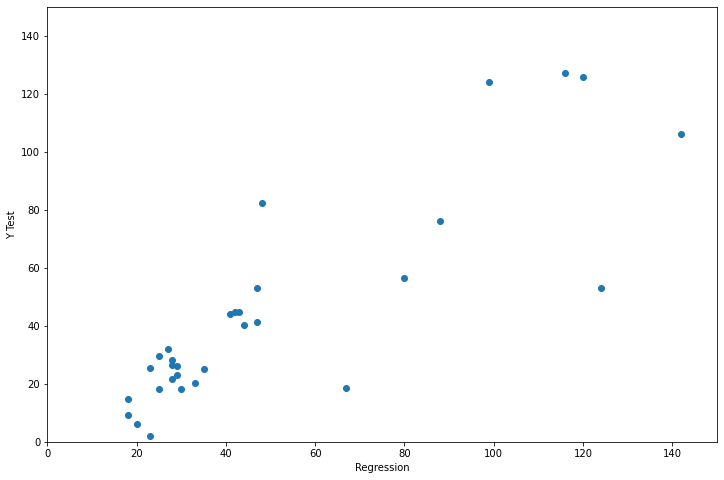

In [149]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(ytest_C,lpred_C)
plt.xlabel("Regression")
plt.ylabel("Y Test")
plt.xlim(0,150)
plt.ylim(0,150)
plt.show()

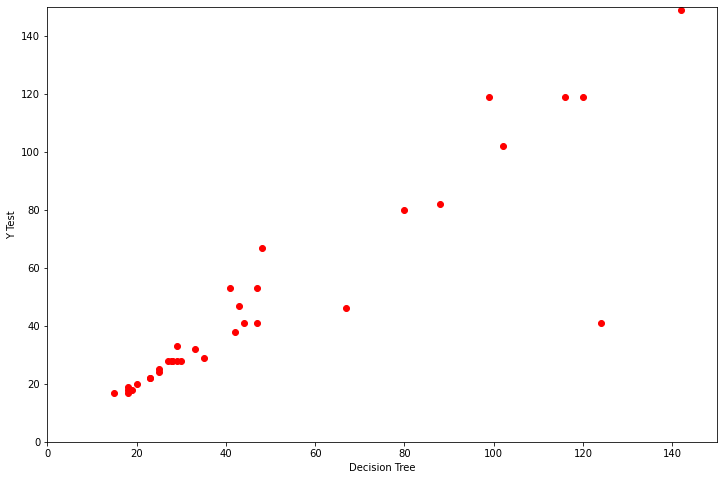

In [150]:
plt.figure(figsize=(12,8))
plt.scatter(ytest_C,Dpred_C, color='red')
plt.xlabel("Decision Tree")
plt.ylabel("Y Test")
plt.xlim(0,150)
plt.ylim(0,150)
plt.show()

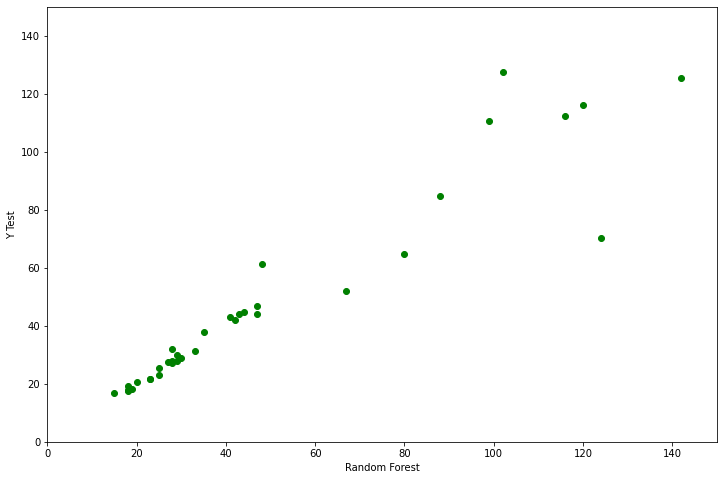

In [151]:
plt.figure(figsize=(12,8))
plt.scatter(ytest_C,Rpred_C, color='green')
plt.xlabel("Random Forest")
plt.ylabel("Y Test")
plt.xlim(0,150)
plt.ylim(0,150)
plt.show()

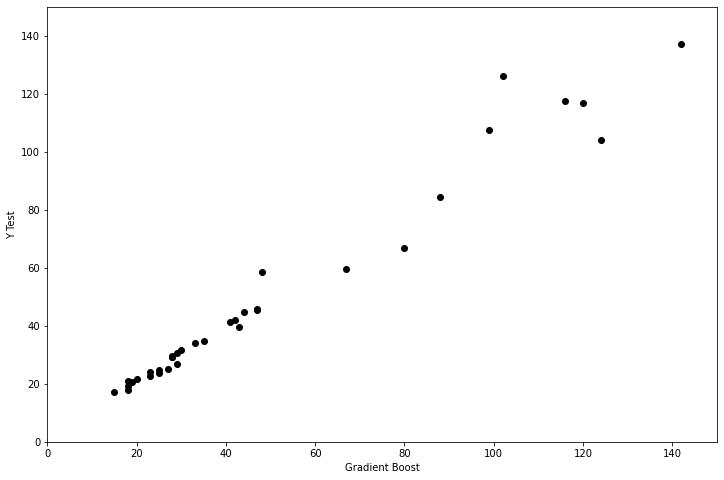

In [152]:
plt.figure(figsize=(12,8))
plt.scatter(ytest_C,Gpred_C,  color='black')
plt.xlabel("Gradient Boost")
plt.ylabel("Y Test")
plt.xlim(0,150)
plt.ylim(0,150)
plt.show()

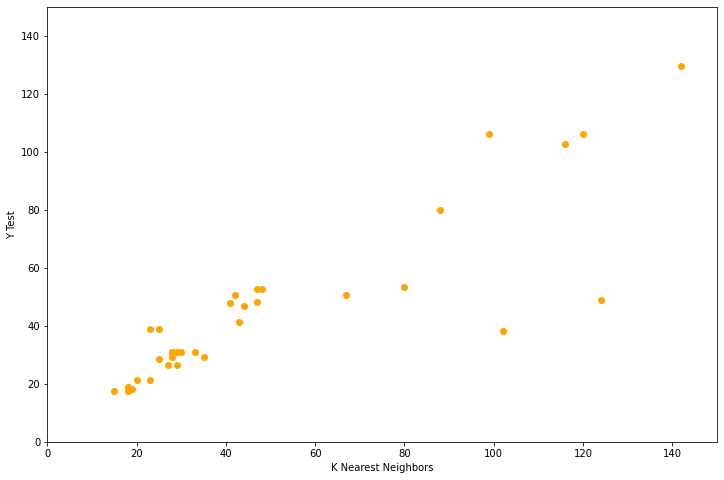

In [153]:
plt.figure(figsize=(12,8))

plt.scatter(ytest_C,Kpred_C, color='orange')
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Y Test")
plt.xlim(0,150)
plt.ylim(0,150)
plt.show()